In [ ]:
source('helpers.R')
library(scRepertoire)

In [2]:
prepost <- readRDS("../../../ProcessedData/seurat/annotated_prepost_csf.rds")

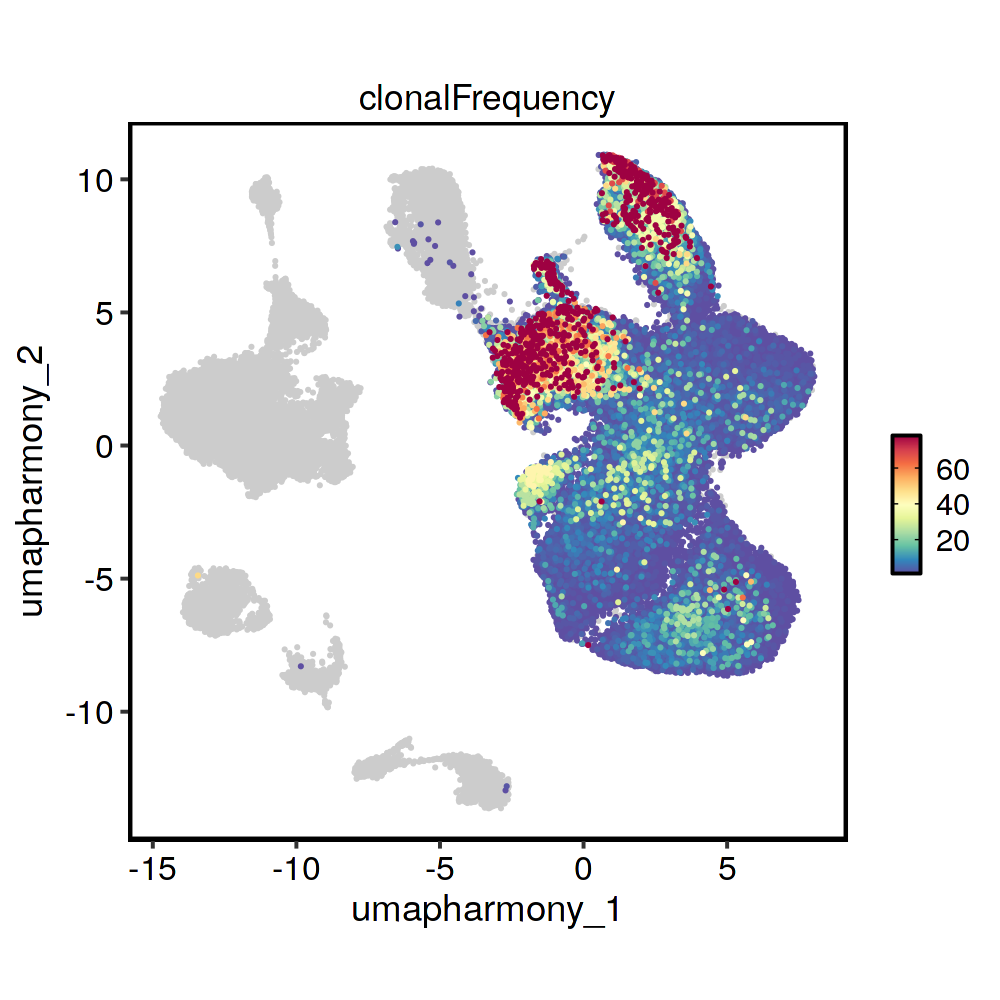

In [3]:
options(repr.plot.width = 5, repr.plot.height = 5, repr.plot.res=200)
FeatureDimPlot(prepost,  features = c('clonalFrequency'),  ncol=3,reduction = "umap.harmony", show_stat=F, label = F, pt.size=0.1)

In [4]:
tcell_types <-  c('CD4+ T','Treg','CD8+ T','Cycling CD8+ T')

In [7]:
prepost$tcr = 'none'
prepost$tcr[!is.na(prepost$cloneSize)] = 'present'

tcells <- subset(prepost, tcr == 'present'  & cell_type %in% tcell_types)

tcells$cell_type[tcells$cell_type == 'Cycling CD8+ T'] = 'CD8+ T'
tcells$cell_type = factor(tcells$cell_type , levels=c('CD4+ T','Treg','CD8+ T'))

In [8]:
tcells$expanded = 'Unexpanded'
tcells$expanded[tcells$clonalFrequency > 1] = 'Expanded'

In [9]:
tcells$expanded_by_day = paste0(tcells$expanded, ' ', tcells$Day)
levels_expanded_by_day <- c("Unexpanded D0", "Unexpanded D7","Unexpanded D21", "Expanded D0", "Expanded D7", "Expanded D21")
tcells$expanded_by_day <- factor(tcells$expanded_by_day, levels_expanded_by_day)
tcells$cell_type <- factor(tcells$cell_type, levels = c('CD4+ T','CD8+ T', 'Treg'))

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


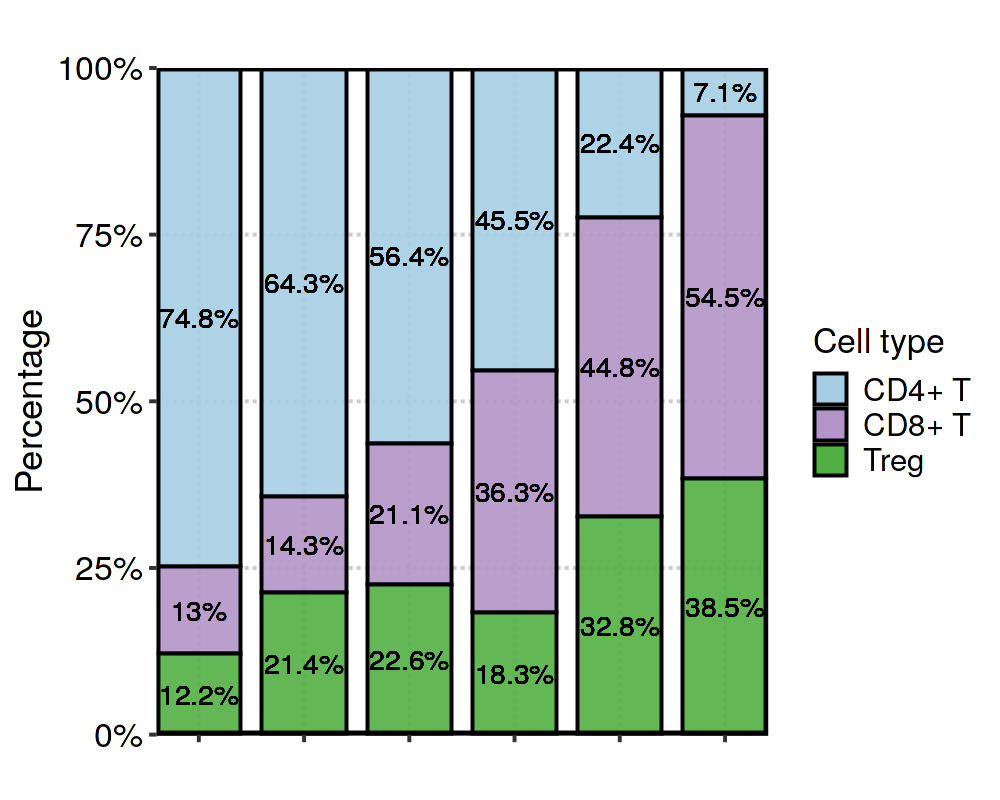

In [12]:
options(repr.plot.width = 5, repr.plot.height = 4, repr.plot.res=200)
p <- CellStatPlot(tcells, stat.by = "cell_type", group.by = "expanded_by_day", alpha=0.9,
                  label.bg.r = 0.0, label.fg = "black", label.bg = "black",label = T) +
    scale_fill_manual(values = cell_type_cols[as.character(unique(tcells$cell_type))], name = "Cell type") &
    theme(axis.text.x=element_blank()) & xlab('')
p

In [13]:
pdf(file.path(panel.path, paste0("6D_tcrpos_carneg_composition_by_expansion_and_day.pdf")), width=5, height=4)
p
dev.off()

pdf 
  2

In [34]:
day07 <- subset(prepost, Day %in% c('D0','D7') & cell_type %in% c('Treg'))

In [35]:
data = clonalDiversity(
    day07, cloneCall = "strict", group.by='sample_id',
    x.axis = "Day", n.boots = 500,  palette = "Set2", exportTable = TRUE
)

In [36]:
data$patient <- sub("(\\d+)D.*", "\\1", data$sample_id)
data$timepoint <- sub(".*D(\\d+)", "\\1", data$sample_id)

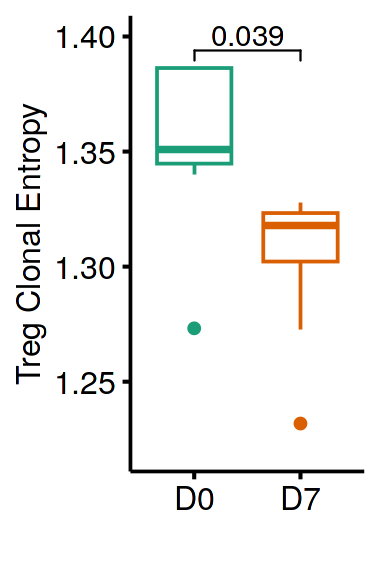

In [37]:
cols = pal_npg()(2)
names(cols) = unique(data$Day)

options(repr.plot.width = 2, repr.plot.height = 3, repr.plot.res=190)
my_comparisons <- list(c(1, 2))
ggboxplot(data, x = "Day", y = "shannon", color = "Day", palette = "Dark2") + ylim(c(1.22,1.40))+
stat_compare_means(comparisons = my_comparisons, paired=T) + xlab('') + ylab('Treg Clonal Entropy') + NoLegend() 

In [32]:
tumred = read.csv("../../../RawData/clinical_data/tumor-reduction-data.csv")
rownames(tumred) <- tumred$patient

In [21]:
merged_data <- data[data$Day == 'D7',] %>% inner_join(tumred, by = "patient")

merged_data$predictor = merged_data$shannon
merged_data$reduction = - merged_data$reduction

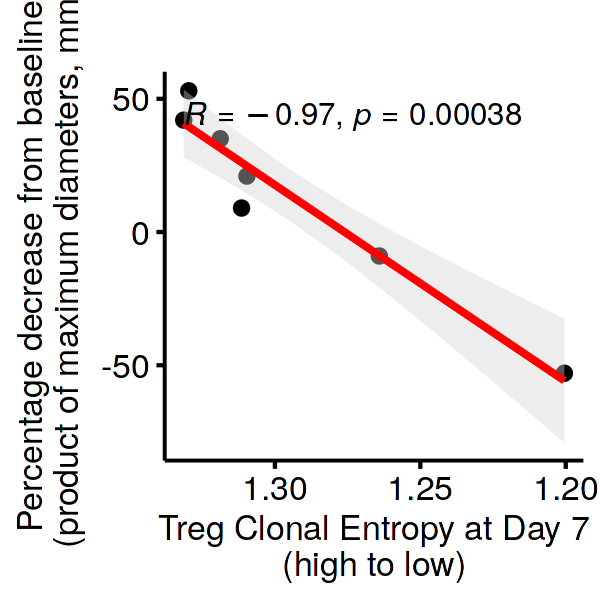

In [25]:
options(repr.plot.width = 3, repr.plot.height = 3, repr.plot.res=200)
ggscatter(merged_data, x = "shannon", y = "reduction", add = "reg.line", conf.int = TRUE, cor.coef = TRUE,
          cor.method = "pearson",     # use Spearman’s rho
          add.params = list(color = "red", fill = "lightgray"), xlab = "Treg Clonal Entropy at Day 7", 
          ylab = "Percentage decrease from baseline\n (product of maximum diameters, mm²)", title = "") + 
scale_x_reverse(name = "Treg Clonal Entropy at Day 7\n(high to low)") 


In [27]:
pdf(file.path(panel.path, "6E_shannon_entropy_treg_d0v7.pdf"), width=2, height=3, family = "sans")
my_comparisons <- list(c(1, 2))
ggboxplot(data, x = "Day", y = "shannon", color = "Day", palette = "Dark2") + ylim(c(1.22,1.40))+
stat_compare_means(comparisons = my_comparisons, paired=T) + xlab('') + ylab('Shannon Entropy') + NoLegend() 
while (!is.null(dev.list()))  dev.off()

Warning message:
"Removed 1 row containing non-finite outside the scale range (`stat_boxplot()`)."
Warning message:
"Removed 1 row containing non-finite outside the scale range (`stat_signif()`)."
